# DESAFIO MERCADO LIBRE DATA SCIENCE

# 1. Explorar las ofertas relámpago, ¿qué insights puedes generar?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
offers_df = pd.read_csv('ofertas_relampago.csv')

In [3]:
offers_df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [4]:
# El DataFrame toma los strings "NA" como valores nulos.
offers_df['ORIGIN'] = offers_df['ORIGIN'].fillna('NA')

In [5]:
offers_df.shape

(48746, 13)

In [6]:
offers_df.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')

In [7]:
offers_df.nunique()

OFFER_START_DATE               61
OFFER_START_DTTM              783
OFFER_FINISH_DTTM            7578
OFFER_TYPE                      1
INVOLVED_STOCK                505
REMAINING_STOCK_AFTER_END     801
SOLD_AMOUNT                  7603
SOLD_QUANTITY                 373
ORIGIN                          2
SHIPPING_PAYMENT_TYPE           2
DOM_DOMAIN_AGG1                36
VERTICAL                        9
DOMAIN_ID                    1266
dtype: int64

In [8]:
offers_df['DOM_DOMAIN_AGG1'].unique()

array(['PETS FOOD', 'PET PRODUCTS', 'COMPUTERS', 'ELECTRONICS', 'APPAREL',
       'PARTY', 'TOYS AND GAMES', 'PERSONAL CARE', 'INDUSTRY',
       'TOOLS AND CONSTRUCTION', 'HOME&DECOR', 'SPORTS',
       'BOOKS, MULTIMEDIA & OTHER E!', 'AUTOPARTS', 'DRINKS', 'FOOTWEAR',
       'WHEELS & TIRES', 'BEAUTY EQUIPMENT', 'MOBILE',
       'APPAREL ACCESORIES', 'FOODS', 'PHARMACEUTICS', 'STATIONARY',
       'BABY', 'PERSONAL HYGIENE', 'OTHER', 'VEHICULAR MULTIMEDIA',
       'SUPLEMENTS', 'SECURITY', 'MOTOPARTS', 'CLEANING', 'ACC TOOLS',
       'MUSICAL INSTRUMENTS', 'ANTIQUES & HOBBIES', 'BATTERIES', 'AGRO'],
      dtype=object)

In [9]:
offers_df['VERTICAL'].unique()

array(['CPG', 'OTHERS', 'CE', 'APP & SPORTS', 'T & B', 'BEAUTY & HEALTH',
       'HOME & INDUSTRY', 'ENTERTAINMENT', 'ACC'], dtype=object)

In [10]:
# Elimino columnas no necesarias en el análisis.
offers_df = offers_df.drop(['OFFER_TYPE','ORIGIN','VERTICAL','DOMAIN_ID'], axis = 1)

In [11]:
offers_df.isnull().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
dtype: int64

In [12]:
# Se rellena de 0 los campos vacíos porque representan que no hubo ventas.
offers_df['SOLD_AMOUNT'] = offers_df['SOLD_AMOUNT'].fillna('0')
offers_df['SOLD_QUANTITY'] = offers_df['SOLD_QUANTITY'].fillna('0')

In [13]:
# Se convierten los campos a sus respectivos tipos.
offers_df['SOLD_QUANTITY'] = offers_df['SOLD_QUANTITY'].astype('int64')
offers_df['INVOLVED_STOCK'] = offers_df['INVOLVED_STOCK'].astype('int64')
offers_df['SOLD_AMOUNT'] = offers_df['SOLD_AMOUNT'].astype('float')


offers_df['OFFER_START_DTTM'] = offers_df['OFFER_START_DTTM'].str.removesuffix("+00:00")
offers_df['OFFER_FINISH_DTTM'] = offers_df['OFFER_FINISH_DTTM'].str.removesuffix("+00:00")

offers_df['OFFER_START_DTTM'] = offers_df['OFFER_START_DTTM'].astype('datetime64[ns]')
offers_df['OFFER_FINISH_DTTM'] = offers_df['OFFER_FINISH_DTTM'].astype('datetime64[ns]')

In [14]:
offers_df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,48746.000000,48746.000000
mean,35.007508,30.565216,25.820857,5.471382
std,206.761058,195.813806,127.051542,32.743776
min,1.000000,-192.000000,0.000000,0.000000
25%,5.000000,4.000000,0.000000,0.000000
50%,10.000000,8.000000,1.000000,1.000000
75%,15.000000,15.000000,12.590000,3.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


array([[<AxesSubplot:title={'center':'INVOLVED_STOCK'}>,
        <AxesSubplot:title={'center':'REMAINING_STOCK_AFTER_END'}>],
       [<AxesSubplot:title={'center':'SOLD_AMOUNT'}>,
        <AxesSubplot:title={'center':'SOLD_QUANTITY'}>]], dtype=object)

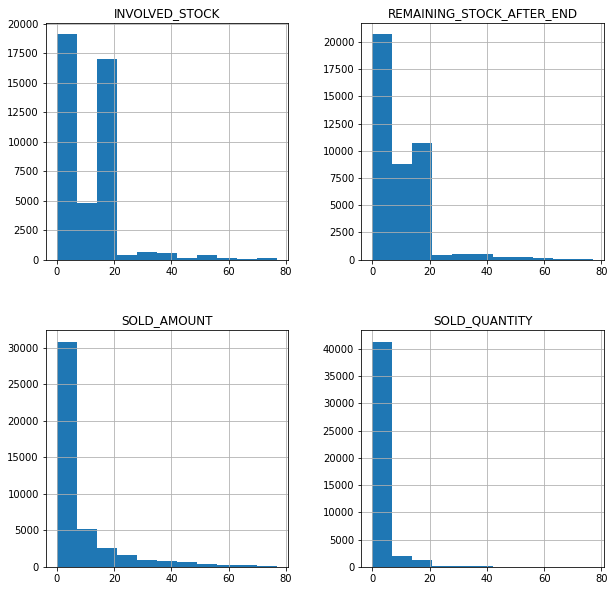

In [70]:

offers_df[['INVOLVED_STOCK','REMAINING_STOCK_AFTER_END','SOLD_AMOUNT','SOLD_QUANTITY']].hist(bins=[0,7,14,21,28,35,42,49,56,63,70,77], figsize=(10,10))


In [68]:
# Eliminar filas donde existen inconsitencias entre el stock, la cantidad vendida y el stock restante.
for i,j in offers_df.iterrows():
    if (j.INVOLVED_STOCK - j.REMAINING_STOCK_AFTER_END) !=  j.SOLD_QUANTITY:
        offers_df = offers_df.drop(i)

In [69]:
offers_df.shape

(45163, 9)

In [71]:
# Calcular intervalo en minutos entre el inicio de oferta y el final de la oferta.
interval = []
for i,j in offers_df.iterrows():
    difference = j.OFFER_FINISH_DTTM - j.OFFER_START_DTTM
    interval.append(round(difference.seconds/60))
offers_df["INTERVALO_MINUTOS"] = interval

In [72]:
# Reemplazo la columna SHIPPING_PAYMENT_TYPE por 1 si tiene free_shipping y 0 si no lo tiene.
offers_df = offers_df.replace({"free_shipping": 1, "none": 0})

In [73]:
offers_df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,INTERVALO_MINUTOS
0,2021-06-22,2021-06-22 16:00:00,2021-06-22 23:02:43,4,-2,4.72,6,0,PETS FOOD,423
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,5,5,0.00,0,1,PET PRODUCTS,360
2,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:01,15,12,10.73,3,0,COMPUTERS,360
3,2021-06-22,2021-06-22 19:00:00,2021-06-23 01:36:12,15,13,7.03,2,0,COMPUTERS,396
4,2021-06-22,2021-06-22 13:00:00,2021-06-22 15:48:12,15,0,39.65,15,0,COMPUTERS,168
...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00,2021-06-19 19:00:01,15,9,16.28,6,0,HOME&DECOR,360
48742,2021-06-19,2021-06-19 13:00:00,2021-06-19 19:00:01,5,5,0.00,0,1,HOME&DECOR,360
48743,2021-06-19,2021-06-19 07:00:00,2021-06-19 13:00:03,5,3,16.62,2,1,HOME&DECOR,360
48744,2021-06-19,2021-06-19 13:00:00,2021-06-19 19:00:00,5,1,38.79,4,1,HOME&DECOR,360


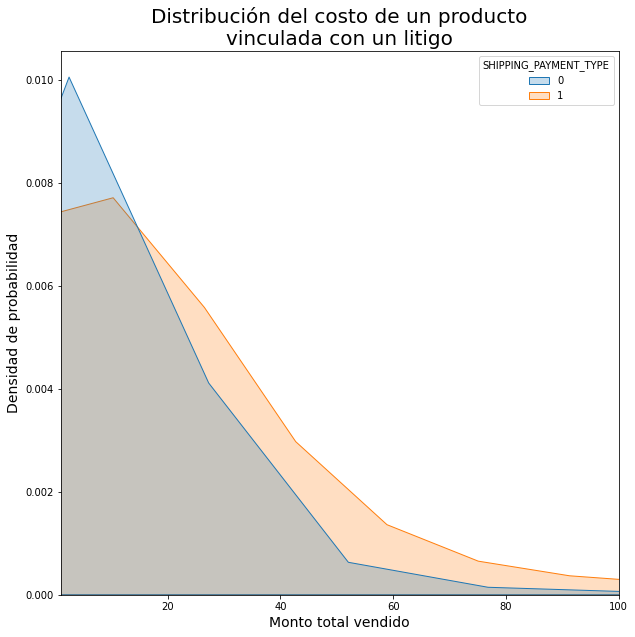

In [101]:
shipping_sold_df = offers_df[['SHIPPING_PAYMENT_TYPE','SOLD_AMOUNT']]
plt.figure(figsize=(10,10)).patch.set_facecolor('xkcd:white')
plt.title('Distribución del costo de un producto\nvinculada con un litigo', fontdict={'size':20})
plt.xlim(1,100)
plt.xlabel('Monto total vendido', fontdict={'size':14})
plt.ylabel('Densidad de probabilidad', fontdict={'size':14})
g = sns.kdeplot(data= shipping_sold_df, x='SOLD_AMOUNT', hue ='SHIPPING_PAYMENT_TYPE', bw_adjust=2, shade=True)

Se observa que el monto se concentra en mayores cantidades cuanto tiene free_shipping.

In [111]:
quantity_df = offers_df.groupby('DOM_DOMAIN_AGG1',as_index=False)[['DOM_DOMAIN_AGG1','INVOLVED_STOCK','SOLD_QUANTITY']].mean().sort_values('SOLD_QUANTITY', ascending=False)

In [112]:
import plotly.graph_objects as go
import numpy as np

x = quantity_df['DOM_DOMAIN_AGG1']

# Line 1
y1 = quantity_df['INVOLVED_STOCK']

# Line 2
y2 = quantity_df['SOLD_QUANTITY']

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y1,
    line_color='rgba(255,255,255,0)',
    showlegend=False,
    name='INVOLVED_STOCK',
))
fig.add_trace(go.Scatter(
    x=x,
    y=y2,
    line_color='rgba(255,255,255,0)',
    name='SOLD_QUANTITY',
    showlegend=False,
))
fig.add_trace(go.Scatter(
    x=x, y=y1,
    line_color='rgb(0,100,80)',
    name='INVOLVED_STOCK',
))
fig.add_trace(go.Scatter(
    x=x, y=y2,
    line_color='rgb(0,176,246)',
    name='SOLD_QUANTITY',
))

fig.update_traces(mode='lines')
fig.show()

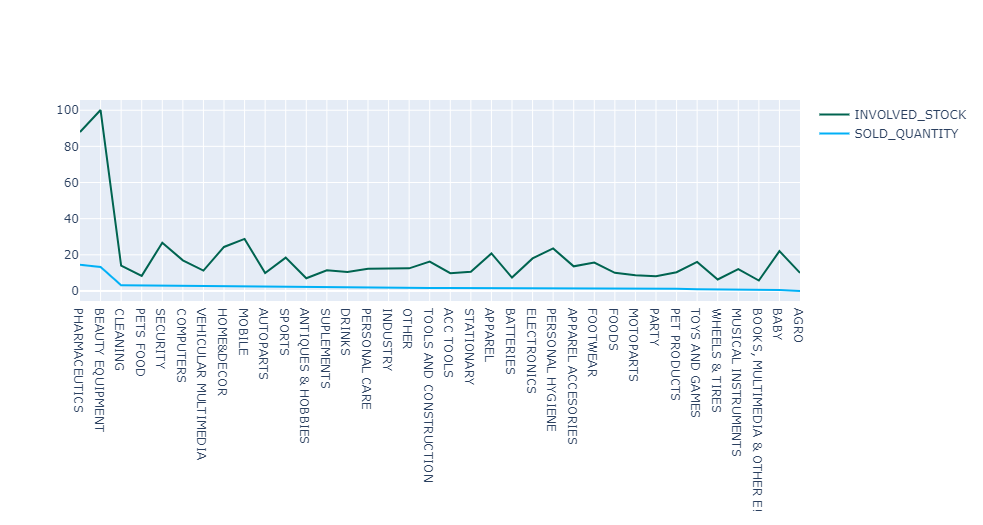

In [122]:
quantity_df.describe()

,INVOLVED_STOCK,SOLD_QUANTITY
count,36.000000,36.000000
mean,18.265472,2.350727
std,19.573369,2.938843
min,5.748466,0.000000
25%,9.969056,1.255520
50%,12.181797,1.648828
75%,18.104039,2.189643
max,100.091658,14.546896


Se observa mayor cantidad de stock del que realmente se vende.

In [150]:
intervalo_sold_df.describe()

,INTERVALO_MINUTOS,SOLD_QUANTITY
count,45163.000000,45163.000000
mean,340.681753,2.742577
std,124.404116,14.453852
min,0.000000,0.000000
25%,360.000000,0.000000
50%,360.000000,0.000000
75%,360.000000,2.000000
max,937.000000,1503.000000


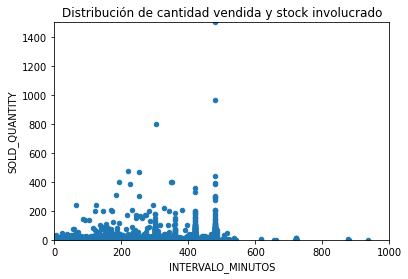

In [151]:
intervalo_sold_df = offers_df[['INTERVALO_MINUTOS','SOLD_QUANTITY']]
fig, ax = plt.subplots(figsize=(6, 4))

intervalo_sold_df.plot(
    x    = 'INTERVALO_MINUTOS',
    y    = 'SOLD_QUANTITY',
    kind = "scatter",
    ax   = ax
)

plt.xlim(0, 1000)
plt.ylim(0, 1500)

ax.set_title('Distribución de cantidad vendida y stock involucrado');

In [152]:
from scipy.stats import pearsonr
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = intervalo_sold_df['INTERVALO_MINUTOS'], y =  intervalo_sold_df['SOLD_QUANTITY'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.0017173589074746774
P-value:  0.7151440942180669


Se observa que no existe correlación entre intervalo de tiempo y la cantidad vendida o el monto vendido.

**Pregunta:** Los productos con stock negativo: ¿son los que más se venden o los que menos stock al iniciar la oferta tienen o los que tienen más tiempo para comprar?

In [157]:
# Creo DataFrame que tenga las categorias de productos y sus cantidades negativas.
negative_stock_df = offers_df.loc[offers_df['REMAINING_STOCK_AFTER_END'] < 0]

In [160]:
negative_stock_df = negative_stock_df.groupby('DOM_DOMAIN_AGG1',as_index=False)[['DOM_DOMAIN_AGG1','REMAINING_STOCK_AFTER_END','INTERVALO_MINUTOS']].mean().sort_values('REMAINING_STOCK_AFTER_END')
negative_stock_df

,DOM_DOMAIN_AGG1,REMAINING_STOCK_AFTER_END,INTERVALO_MINUTOS
6,BEAUTY EQUIPMENT,-6.343750,209.468750
18,PARTY,-5.000000,144.000000
8,COMPUTERS,-4.535354,192.373737
20,PERSONAL HYGIENE,-4.250000,129.750000
15,MOBILE,-3.714286,208.666667
5,BATTERIES,-3.500000,261.500000
7,CLEANING,-3.400000,151.400000
25,SPORTS,-3.329897,212.020619
23,PHARMACEUTICS,-3.194245,191.165468
14,INDUSTRY,-3.050000,212.500000


Se observa que el stock negativo no se debe al intervalo de tiempo. Por ejemplo BEAUTY EQUIPMENT tiene menor intervalo en promedio de tiempo que BATTERIES y sin embargo en promedio el stock negativo de BEAUTY EQUIPMENT es mayor. No se debe a que son los productos más vendidos porque PARTY tiene en promedio mayor stock negativo y es la categoría con menos cantidad vendida. Se debe simplemente al contarse con menos stock al iniciar la oferta.

In [24]:
offers_df.groupby('DOM_DOMAIN_AGG1',as_index=False)[['DOM_DOMAIN_AGG1','INTERVALO_MINUTOS','INVOLVED_STOCK','SOLD_QUANTITY']].mean().sort_values('INTERVALO_MINUTOS', ascending=False)

,DOM_DOMAIN_AGG1,INTERVALO_MINUTOS,INVOLVED_STOCK,SOLD_QUANTITY
6,BABY,418.440165,22.004127,0.460798
26,PETS FOOD,383.150110,8.333333,3.041943
33,TOYS AND GAMES,362.822812,16.058824,0.880201
1,AGRO,360.000000,10.000000,0.000000
32,TOOLS AND CONSTRUCTION,353.330904,16.287901,1.671283
9,"BOOKS, MULTIMEDIA & OTHER E!",353.073620,5.748466,0.656442
16,HOME&DECOR,351.613895,24.343326,2.386885
3,APPAREL,351.607431,20.735864,1.587237
17,INDUSTRY,351.181329,12.149013,1.798923
19,MOTOPARTS,347.752381,8.628571,1.220635


**CONCLUSIÓN:** Al observar la tabla podemos concluir que el intervalo de tiempo no afecta a la cantidad de productos vendidos en la oferta. La categoria BABY es la categoría con mayor intervalo de tiempo y sin embargo PHARMACEUTICS tiene menor intervalo y es la categoría que se vende en mayor cantidad.

Analizamos SOLD_AMOUNT

In [155]:
# La distribución se encuentra sesgada hacia la derecha. Se puede transformar la variable usando el logaritmo.
fig = px.histogram(offers_df, x=np.log(offers_df["SOLD_AMOUNT"]))
fig.show()


C:\Users\sen-m\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



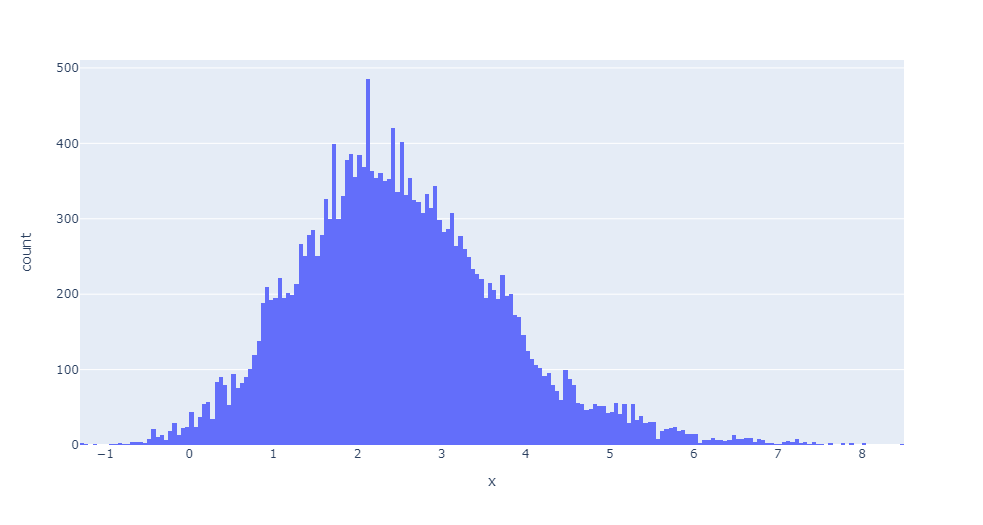

In [156]:
date_df = offers_df.groupby('OFFER_START_DATE',as_index=False)['SOLD_AMOUNT'].median()
fig = px.line(date_df, x='OFFER_START_DATE', y="SOLD_AMOUNT")
fig.show()

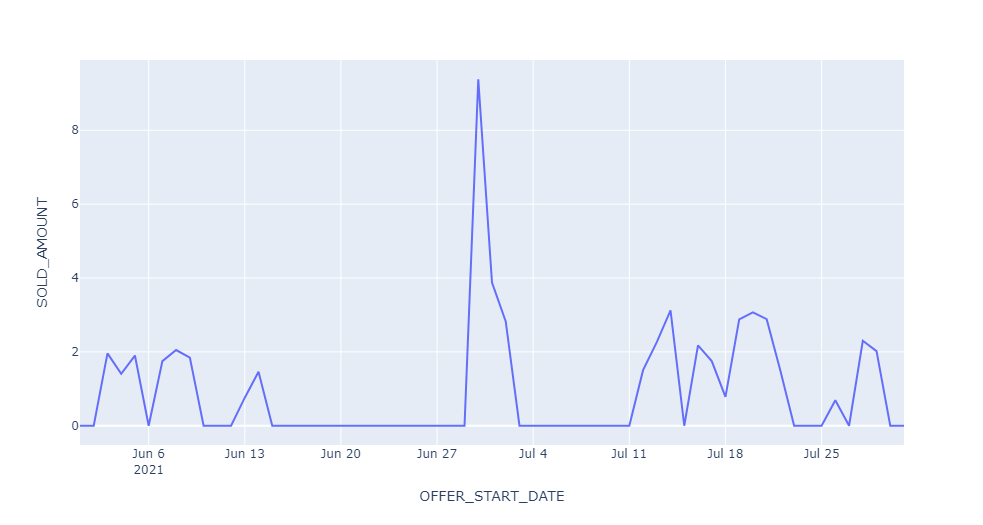

No es posible sacar conclusiones de relación entre la fecha y el monto vendido.